# Exploring the Depths of Netflix: A Comprehensive Dataset of Movies and TV Shows

Kaggle dataset: [source](https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows)

## Overview

Netflix stands as a leading force in the realm of media and video streaming. With a staggering array of over 8,000 movies and TV shows accessible on their platform, as of mid-2021, their global subscriber count exceeds 200 million. This tabulated dataset comprehensively catalogues all offerings on Netflix, including vital details such as cast, directors, ratings, release year, duration, and more.

## Dataset Overview

-   Total Entries: The dataset contains 8,809 entries, each representing a unique movie or TV show.
-   Columns: There are 12 columns in the dataset:
    -   `show_id`: A unique identifier for each title.
    -   `type`: The category of the title, which is either 'Movie' or 'TV Show'.
    -   `title`: The name of the movie or TV show.
    -   `director`: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)
    -   `cast`: The list of main actors/actresses in the title. (Some entries might not have this information.)
    -   `country`: The country or countries where the movie or TV show was produced.
    -   `date_added`: The date the title was added to Netflix.
    -   `release_year`: The year the movie or TV show was originally released.
    -   `rating`: The age rating of the title.
    -   `duration`: The duration of the title, in minutes for movies and seasons for TV shows.
    -   `listed_in`: The genres the title falls under.
    -   `description`: A brief summary of the title.

## Analysis Steps

1. **Distribution of Releases**: Analyze the distribution of movie and TV show releases over the years.
2. **One Hot Encode Genres**: Convert the 'listed_in' column into one-hot encoded genres for analysis.
3. **Genre Distribution**: Analyze the distribution of genres across all titles.
4. **Genre Correlation**: Examine the correlation between different genres.
5. **Genre Trends Over Time**: Explore the trends of different genres over the years.
6. **Genre Co-occurrence**: Investigate which genres are most likely to occur together.

## Next Steps

Future analysis could include:

-   Genre Clustering: Use clustering algorithms to group similar genres together.
-   Genre Prediction: Build a genre prediction model based on other features in the dataset to predict the genre of a movie or TV show.


In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [362]:
df = pd.read_csv('./data/netflix_titles.csv', encoding='unicode_escape')

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [364]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
# drop empty columns
df.dropna(axis='columns', inplace=True)
df

,show_id,type,title,release_year,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,2015,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,2024,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [366]:
df.sort_values('release_year')

,show_id,type,title,release_year,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,1925,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,1942,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,1942,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,1943,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,1943,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
...,...,...,...,...,...,...
857,s858,TV Show,The Neighbor,2021,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...
855,s856,TV Show,Jurassic World Camp Cretaceous,2021,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...",Six teens invited to attend a state-of-the-art...
853,s854,Movie,Army of the Dead,2021,"Action & Adventure, Horror Movies","After a zombie outbreak in Las Vegas, a group ..."
965,s966,TV Show,Yasuke,2021,"Anime Series, International TV Shows",A peaceful boatman once known as the Black Sam...


## Distribution of Releases


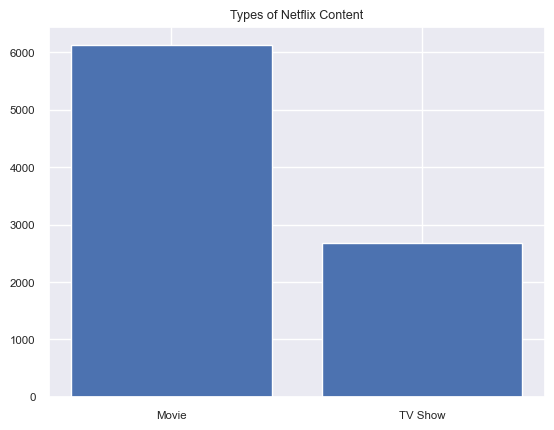

In [367]:
type_count = Counter(df.type)
plt.bar(type_count.keys(), type_count.values())
plt.title("Types of Netflix Content")
plt.show()

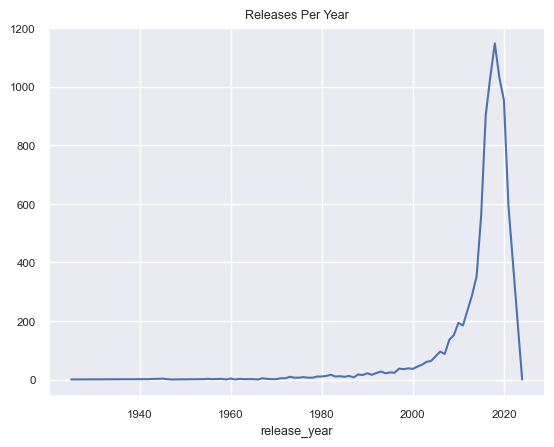

In [368]:
# display number of releases per year
df.groupby(['release_year']).count()['show_id'].plot()
plt.title("Releases Per Year")
plt.show()

In [369]:
# drop year 2024
df.drop(df[df['release_year'] == 2024].index, inplace=True)

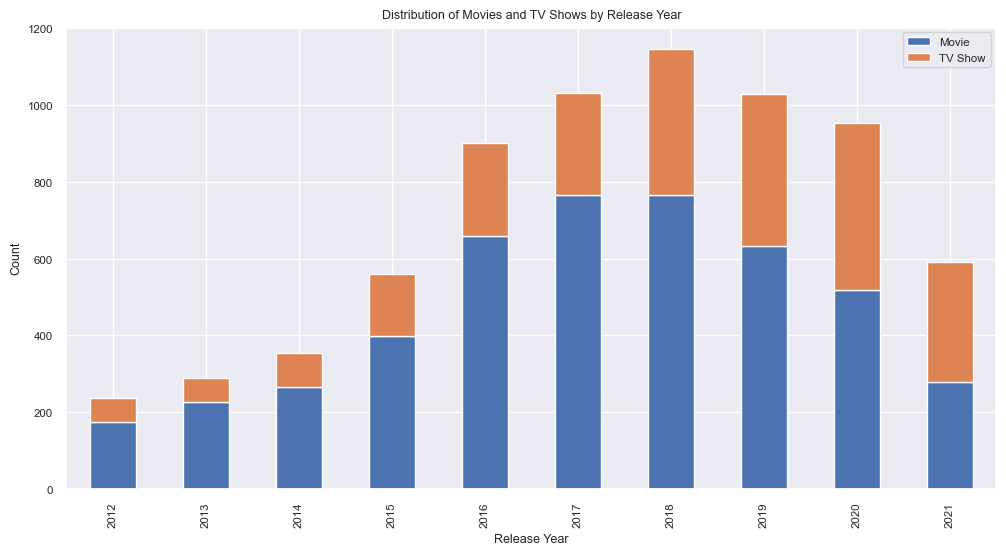

In [391]:
# display type per release year
grouped = df.groupby(['release_year', 'type']).size().unstack()[-10:]
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.set_title('Distribution of Movies and TV Shows by Release Year')
plt.legend(['Movie', "TV Show"])
plt.show()

## One Hot Encode Genres


In [371]:
data = df['listed_in'].tolist()
genre_list = [genre.strip()
              for sublist in data for genre in sublist.split(', ')]
genre_list = set(genre_list)

In [372]:
genres = df['listed_in'].str.split(', ', expand=True)
genres

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None
8806,Dramas,International Movies,Music & Musicals


In [373]:
# clean up genres to reduce duplicated genres eg) Dramas and Drama
# remove redundant genres TV Shows and Movies
genres.replace('Dramas', 'Dramatic Movies', inplace=True)
genres.replace('Drama', 'Dramatic Movies', inplace=True)
genres.replace('Thrillers', 'Thriller', inplace=True)
genres.replace('Romance', 'Romantic Movies', inplace=True)
genres.replace('Comedies', 'Comedic Movies', inplace=True)
genres.replace('TV Shows', None, inplace=True)
genres.replace('Movies', None, inplace=True)

In [374]:
# create a secondary df to contain all genres for each item
ohe = pd.get_dummies(genres.unstack()).droplevel(0)
ohe = ohe.groupby(ohe.index).sum()
# Concatenate the one-hot encoded genres with the original DataFrame
df_encoded = pd.concat([df, ohe], axis=1)

## Genre Distribution

To find the genre distribution, we sum the number of items by the genre and sort in descending order.

Overall, most popular genre is International Movies closely followed by Drama and the least popular genre is Classics & Cult TV.

The most popular TV genre is International TV Shows and least popular genre is Classics & Cult TV while the most popular movie genre is International Movies and the least popular movie genre is Faith & Spirituality.


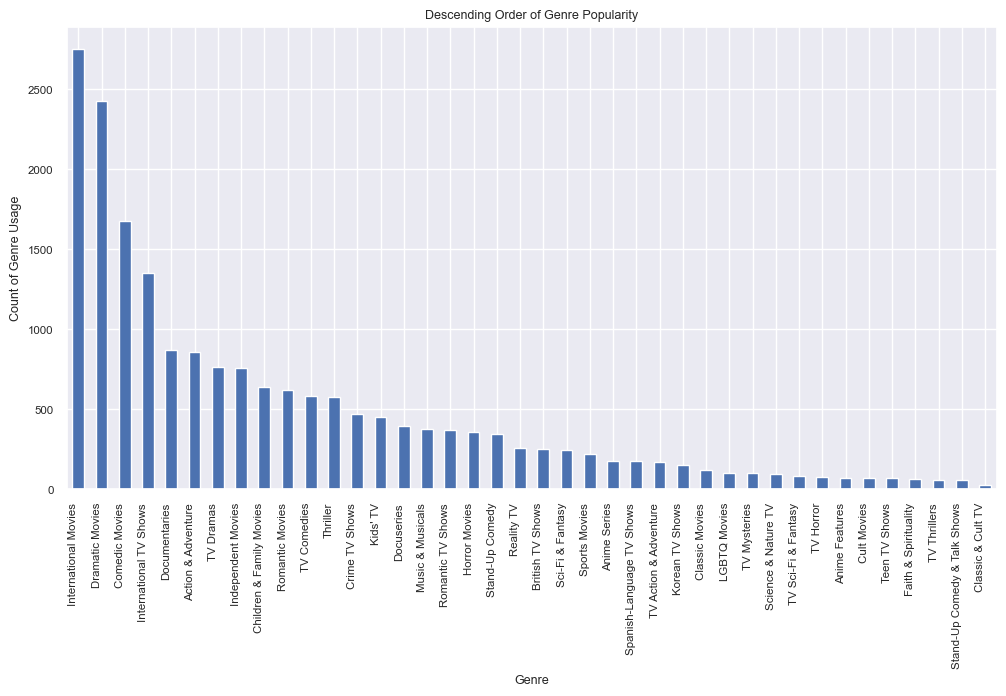

In [375]:
sorted_genres = ohe.sum().sort_values(ascending=False)
sorted_genres.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Genre")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Count of Genre Usage")
plt.title("Descending Order of Genre Popularity")
plt.show()

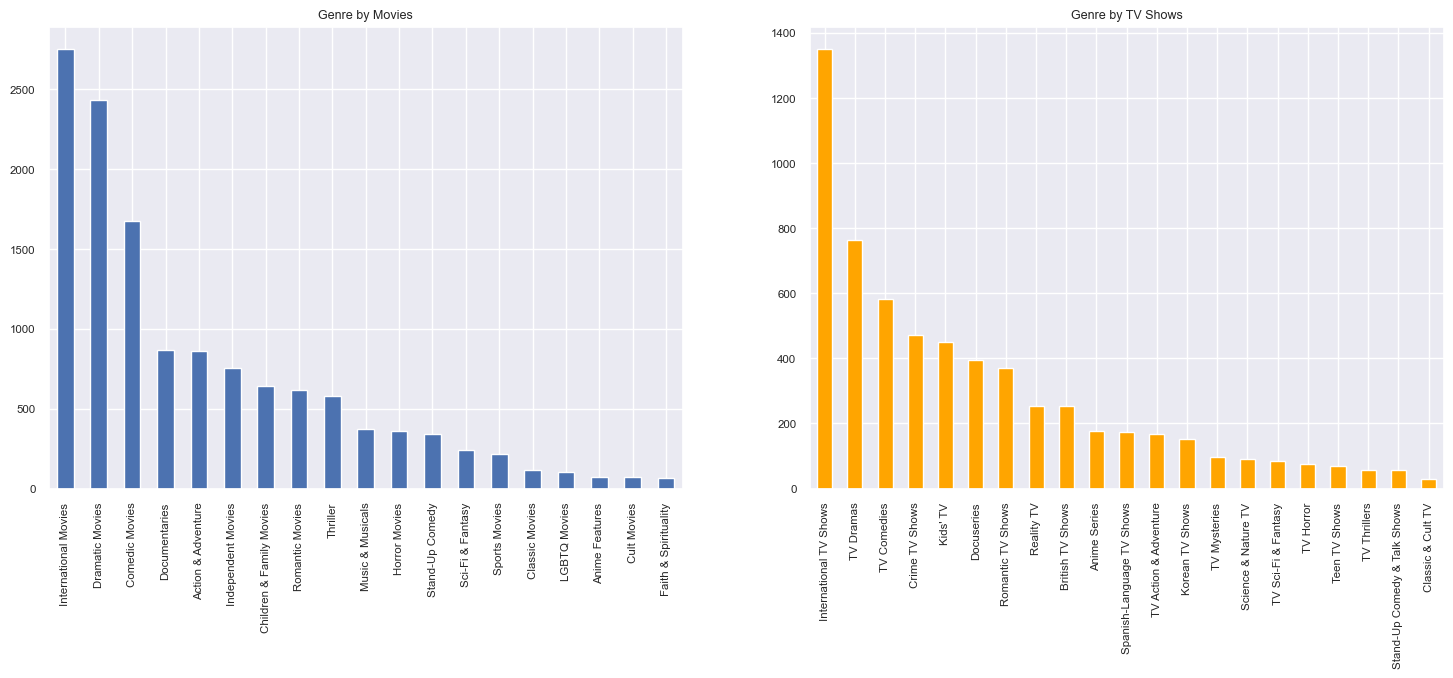

In [376]:
sorted_movie = df_encoded[df_encoded['type'] == "Movie"].drop(
    columns=['release_year']).select_dtypes(include=['int64']).sum().sort_values(ascending=False)
sorted_tv = df_encoded[df_encoded['type'] == "TV Show"].drop(
    columns=['release_year']).select_dtypes(include=['int64']).sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sorted_movie[sorted_movie != 0].plot(kind='bar', ax=ax1)
sorted_tv[sorted_tv != 0].plot(kind='bar', ax=ax2, color='orange')
ax1.set_title("Genre by Movies")
ax2.set_title("Genre by TV Shows")
plt.show()

## Genre Correlation

There does not appear to be any linear correlation between genres as all correlated values fall below 0.5.


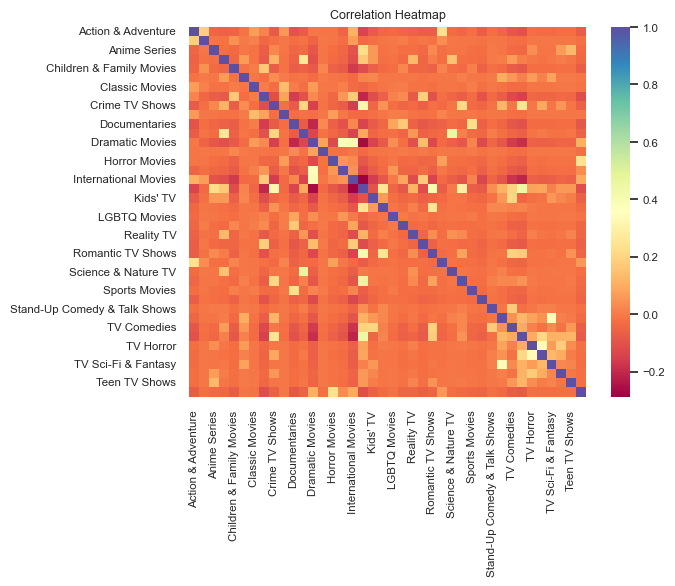

In [377]:
sns.heatmap(ohe.corr(), cmap='Spectral')
plt.title('Correlation Heatmap')
plt.show()

## Genre Trends Over Time

For the 10 years between 2012 and 2021 we can see that International Movies and Dramatic Movies have been consistently the most popular genres on Netflix. Most other genres rise and fall at different times.


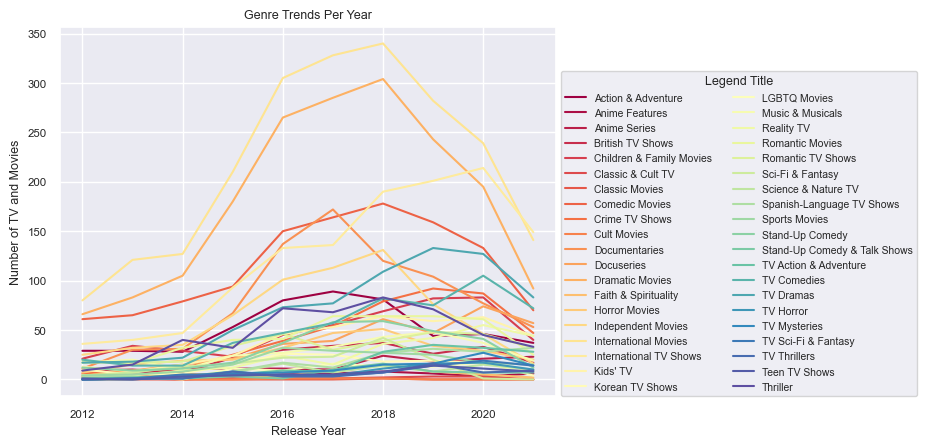

In [378]:
df_encoded.groupby('release_year').sum()[-10:].plot(colormap='Spectral')
plt.legend(fontsize='small', ncol=2, title='Legend Title', loc=(1.01, 0))
plt.title("Genre Trends Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of TV and Movies")
plt.show()

## Genre Co-ocurrence

Using matrix multiplication (dot method) on the transposed one-hot-encoded genres dataframe to get the co-occurrence matrix. The result is a square matrix where each cell represents the count of how often two genres occur together.

Here we see that International Movies are most likely to also be categorized as Dramatic Movie or Comedy.


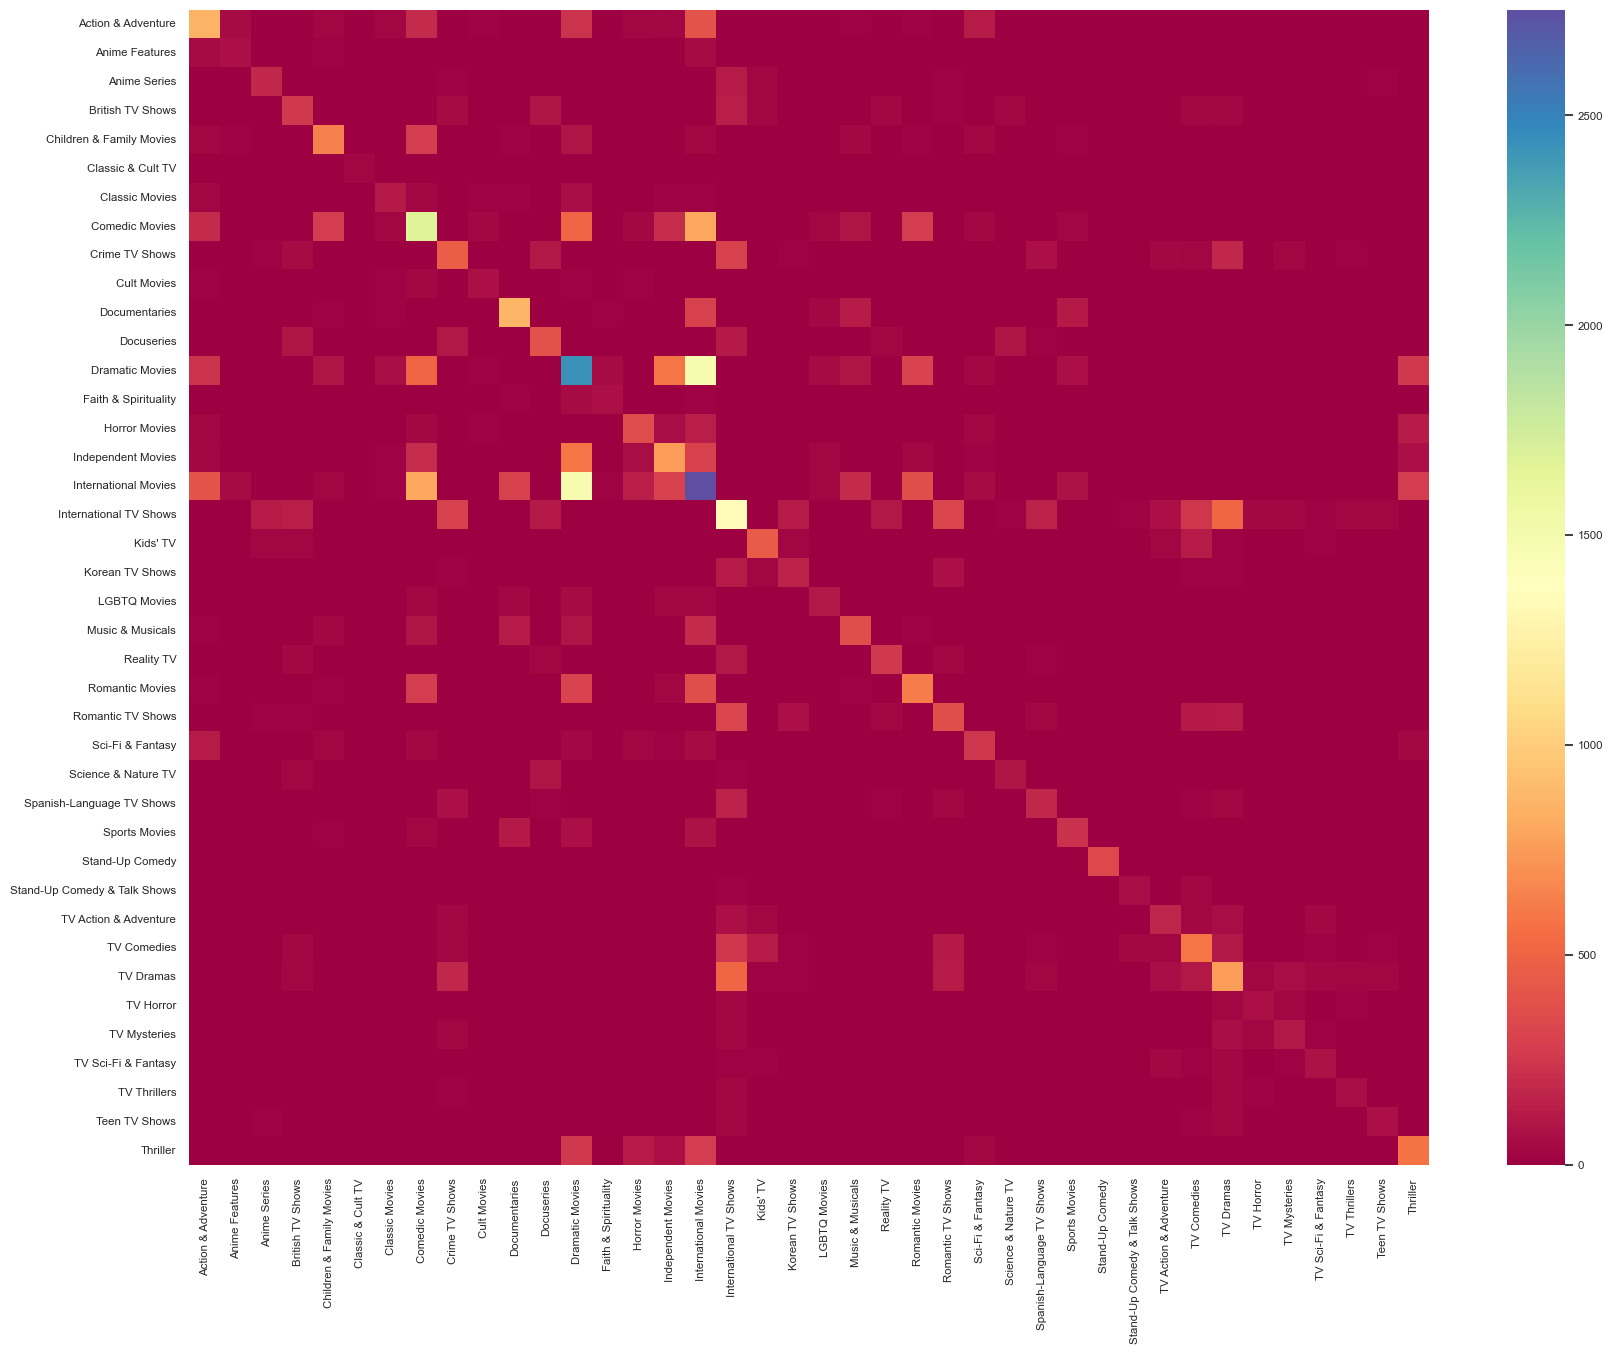

In [379]:
co_occurrence_matrix = ohe.T.dot(ohe)
co_occurrence_df = pd.DataFrame(co_occurrence_matrix)

plt.figure(figsize=(20, 15))
sns.set_theme(font_scale=0.75)
sns.heatmap(co_occurrence_df, cmap='Spectral')
plt.show()